In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("../CRIS_data/train_demand/demand_22222.csv")
df.head()

,'booking_date','journey_date','trnno','brdpt_code','resupto_code','cls','PSGN'
0,2023-04-06,2023-08-01,'22222','AGC ','KYN ','3A ',6
1,2023-04-14,2023-08-01,'22222','NZM ','NK ','3A ',1
2,2023-05-02,2023-08-01,'22222','NZM ','CSMT','1A ',4
3,2023-05-03,2023-08-01,'22222','NZM ','NK ','2A ',2
4,2023-05-14,2023-08-01,'22222','NZM ','NK ','3A ',1


In [3]:
df.shape

(384534, 7)

In [4]:
df.columns = df.columns.str.strip().str.strip("'")
cols_to_clean = ['brdpt_code', 'resupto_code', 'cls', 'trnno']
for col in cols_to_clean:
    df[col] = df[col].str.strip().str.strip("'")
    df[col] = df[col].str.strip()

df.head()

,booking_date,journey_date,trnno,brdpt_code,resupto_code,cls,PSGN
0,2023-04-06,2023-08-01,22222,AGC,KYN,3A,6
1,2023-04-14,2023-08-01,22222,NZM,NK,3A,1
2,2023-05-02,2023-08-01,22222,NZM,CSMT,1A,4
3,2023-05-03,2023-08-01,22222,NZM,NK,2A,2
4,2023-05-14,2023-08-01,22222,NZM,NK,3A,1


In [5]:
(df["brdpt_code"].unique())

array(['AGC', 'NZM', 'VGLJ', 'GWL', 'JL', 'BPL', 'NK', 'KYN', 'BSL'],
      dtype=object)

In [6]:
df["resupto_code"].unique()

array(['KYN', 'NK', 'CSMT', 'VGLJ', 'JL', 'BPL', 'GWL', 'AGC', 'BSL'],
      dtype=object)

In [7]:
print(df["journey_date"].value_counts())
print(df['journey_date'].dtype)


journey_date
2024-11-03    763
2024-08-19    739
2024-12-14    733
2025-01-04    721
2025-03-16    714
             ... 
2023-10-10    354
2023-10-18    351
2023-09-21    347
2024-10-31    256
2023-11-12    251
Name: count, Length: 731, dtype: int64
object


In [8]:
pd.to_datetime(df['journey_date'])
pd.to_datetime(df['booking_date'])

0        2023-04-06
1        2023-04-14
2        2023-05-02
3        2023-05-03
4        2023-05-14
            ...    
384529   2025-08-01
384530   2025-08-01
384531   2025-08-01
384532   2025-08-01
384533   2025-08-01
Name: booking_date, Length: 384534, dtype: datetime64[ns]

In [9]:
df["PSGN"].describe()


count    384534.000000
mean          3.087672
std           4.497931
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         209.000000
Name: PSGN, dtype: float64

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates # Add this line


(67, 7)


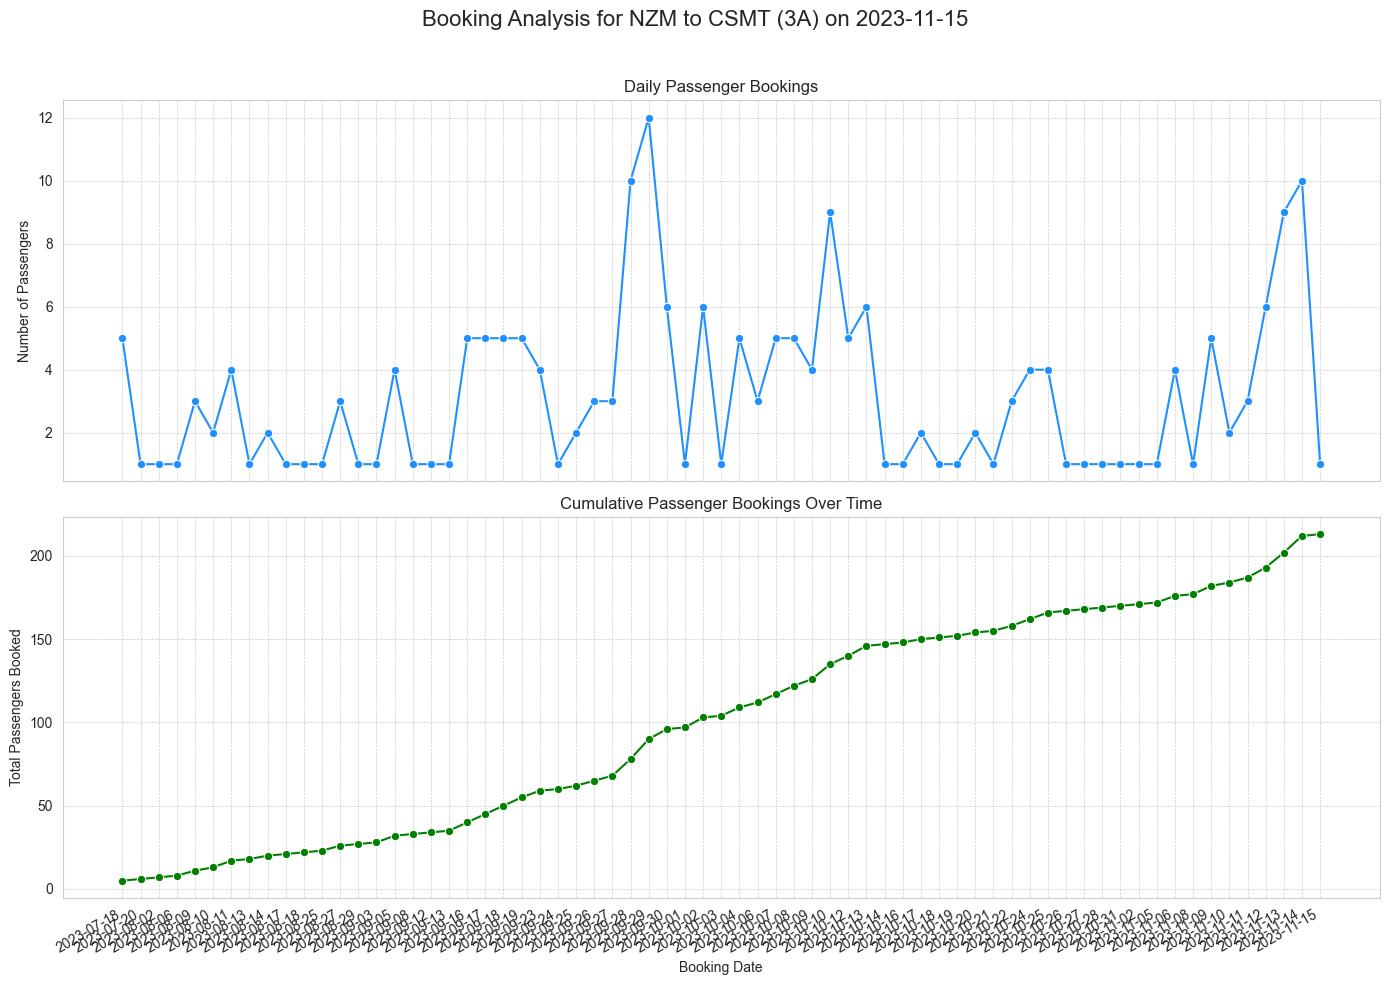

In [11]:


# 1. --- Define and filter for the specific journey ---
# Change these values to analyze the journey you are interested in.
journey_date_filter = '2023-11-15'
brdpt_code_filter = 'NZM'
resupto_code_filter = 'CSMT'
cls_filter = '3A'

# Apply the filters
journey_df = df[
    (df['journey_date'] == journey_date_filter) &
    (df['brdpt_code'] == brdpt_code_filter) &
    (df['resupto_code'] == resupto_code_filter) &
    (df['cls'] == cls_filter)
].copy()

print(journey_df.shape)
# 2. --- Prepare the data for plotting ---
# Sort the data by booking date to ensure the cumulative sum is correct
journey_df = journey_df.sort_values(by='booking_date')

# Calculate the cumulative sum of passengers
journey_df['cumulative_psgn'] = journey_df['PSGN'].cumsum()

# 3. --- Visualize the data ---
# 3. --- Visualize the data ---
# Set a nice plot style
sns.set_style("whitegrid")

# Create a figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Title for the entire figure
fig.suptitle(f'Booking Analysis for {brdpt_code_filter} to {resupto_code_filter} ({cls_filter}) on {journey_date_filter}', fontsize=16)

# Plot 1: Daily Passenger Bookings (PSGN vs. Booking Date) - NOW INVISIBLE
sns.lineplot(ax=axes[0], x='booking_date', y='PSGN', data=journey_df, marker='o', color='dodgerblue')
axes[0].set_title('Daily Passenger Bookings')
axes[0].set_ylabel('Number of Passengers')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)


# Plot 2: Cumulative Passenger Bookings vs. Booking Date - NOW INVISIBLE
sns.lineplot(ax=axes[1], x='booking_date', y='cumulative_psgn', data=journey_df, marker='o', color='green')
axes[1].set_title('Cumulative Passenger Bookings Over Time')
axes[1].set_xlabel('Booking Date')
axes[1].set_ylabel('Total Passengers Booked')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
# date_format = mdates.DateFormatter('%d-%b')
# axes[1].xaxis.set_major_formatter(date_format)

# 2. Rotate the labels for better spacing
plt.setp(axes[1].get_xticklabels(), rotation=30, ha="right")

# Display the plots
plt.tight_layout(rect=[0, 0, 1, 0.96]) 

# Make sure to uncomment this line to see the plot
plt.show()

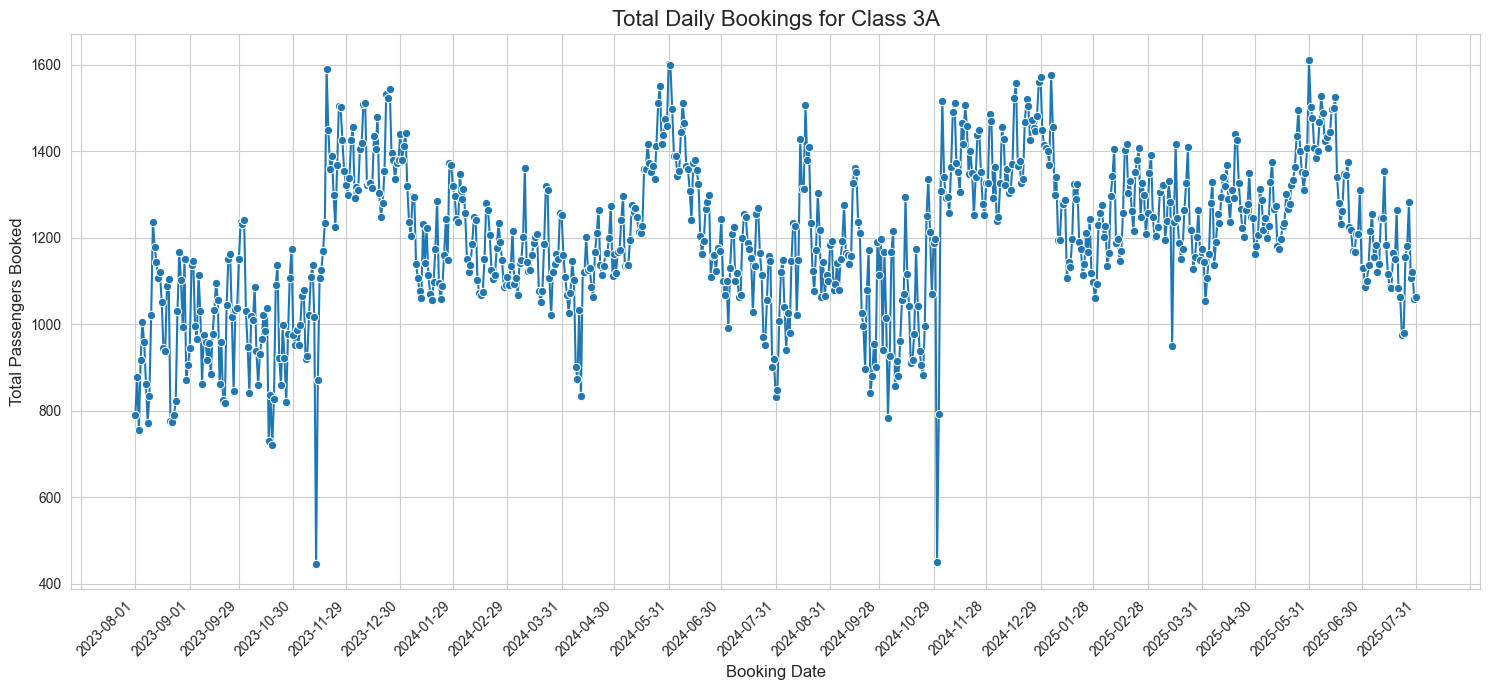

In [12]:
# 1. --- Filter the DataFrame for only class '3A' ---
df_3A = df[df['cls'] == '3A'].copy()


# 2. --- Group by journey date and sum the passengers ---
# This creates a new DataFrame with the total passengers for each day
daily_journey_df = df_3A.groupby('journey_date')['PSGN'].sum().reset_index()
daily_journey_df.rename(columns={'PSGN': 'total_psgn'}, inplace=True)


plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

# Create the line plot
plot = sns.lineplot(
    x='journey_date',
    y='total_psgn',
    data=daily_journey_df,
    marker='o'
)

# Set titles and labels
plot.set_title('Total Daily Bookings for Class 3A', fontsize=16)
plot.set_xlabel('Booking Date', fontsize=12)
plot.set_ylabel('Total Passengers Booked', fontsize=12)

plot.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))

# 2. (Optional but recommended) Format the date to be clean, e.g., "01-Aug"
# plot.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

# 3. (Optional but recommended) Rotate the labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




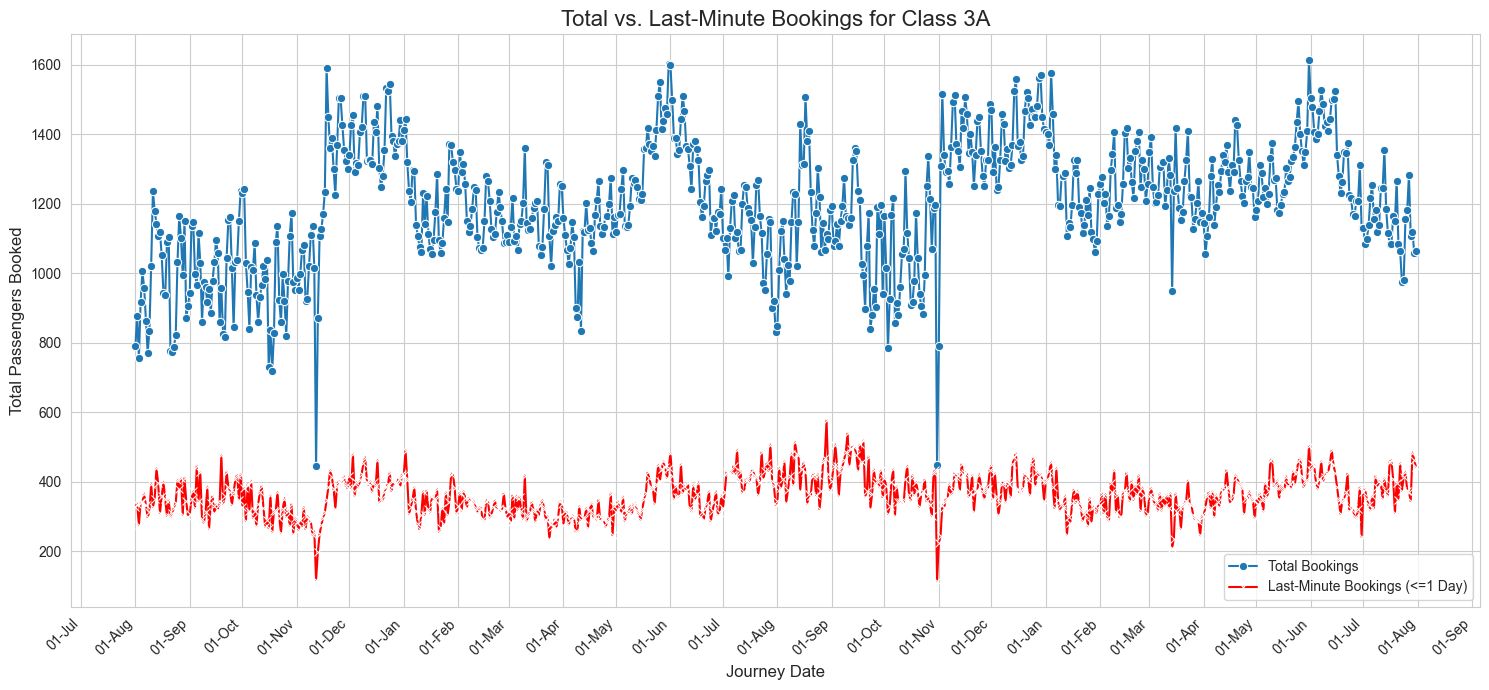

In [ ]:


# Assume 'df' is your initial DataFrame
# Ensure date columns are in datetime format
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['journey_date'] = pd.to_datetime(df['journey_date'])


# --- 1. DATA PREPARATION ---

# Filter for only class '3A'
df_3A = df[df['cls'] == '3A'].copy()

# A. Prepare the data for the FIRST line (total bookings)
daily_journey_df = df_3A.groupby('journey_date')['PSGN'].sum().reset_index()
daily_journey_df.rename(columns={'PSGN': 'total_psgn'}, inplace=True)

# B. Prepare the data for the SECOND line (last-minute bookings)
# Calculate the difference in days between booking and journey
df_3A['days_before_journey'] = (df_3A['journey_date'] - df_3A['booking_date']).dt.days

# Filter for bookings made 0 or 1 day before the journey
last_minute_bookings = df_3A[df_3A['days_before_journey'] <= 1]

# Group by journey date and sum the last-minute passengers
last_minute_summary = last_minute_bookings.groupby('journey_date')['PSGN'].sum().reset_index()
last_minute_summary.rename(columns={'PSGN': 'last_minute_psgn'}, inplace=True)

# C. Merge the two datasets for easy plotting
combined_df = pd.merge(daily_journey_df, last_minute_summary, on='journey_date', how='left').fillna(0)


# --- 2. VISUALIZATION ---

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

# Create the line plot for the FIRST line (Total Passengers)
plot = sns.lineplot(
    x='journey_date',
    y='total_psgn',
    data=combined_df,
    marker='o',
    label='Total Bookings' # Add a label for the legend
)

# ADD THE SECOND line plot on the SAME axes (Last-Minute Passengers)
sns.lineplot(
    x='journey_date',
    y='last_minute_psgn',
    data=combined_df,
    marker='x',
    color='red',
    label='Last-Minute Bookings (<=1 Day)', # Add a label for the legend
    ax=plot # Tell seaborn to draw on the same plot object
)

# Set titles and labels
plot.set_title('Total vs. Last-Minute Bookings for Class 3A', fontsize=16)
plot.set_xlabel('Journey Date', fontsize=12)
plot.set_ylabel('Total Passengers Booked', fontsize=12)

# Format the x-axis ticks
plot.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plot.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.xticks(rotation=45, ha='right')
plt.legend() # Display the legend

plt.tight_layout()
plt.show()

In [15]:
daily_journey_df['day_of_week'] = daily_journey_df['journey_date'].dt.day_name()


# 2. --- Group by the day of the week and calculate the average ---
# This calculates the average 'total_psgn' for each unique day
avg_by_day = daily_journey_df.groupby('day_of_week')['total_psgn'].mean().reset_index()


# 3. --- Sort the results for better readability ---
# By default, the days will be sorted alphabetically (Friday, Monday, etc.)
# Let's sort them in the correct order of the week.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day['day_of_week'] = pd.Categorical(avg_by_day['day_of_week'], categories=days_order, ordered=True)
avg_by_day = avg_by_day.sort_values('day_of_week')

# --- Display the final averaged DataFrame ---
print("Average Total Passengers by Day of the Week:")
print(avg_by_day)


# # 4. --- Visualize the averages with a bar chart ---
# plt.figure(figsize=(10, 6))
# sns.set_style("whitegrid")

# plot = sns.barplot(
#     x='day_of_week',
#     y='total_psgn',
#     data=avg_by_day
# )

# plot.set_title('Average Total Passengers by Day of the Week', fontsize=16)
# plot.set_xlabel('Day of the Week', fontsize=12)
# plot.set_ylabel('Average Total Passengers', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

Average Total Passengers by Day of the Week:
  day_of_week   total_psgn
1      Monday  1169.759615
5     Tuesday  1162.780952
6   Wednesday  1138.161905
4    Thursday  1133.009524
0      Friday  1213.692308
2    Saturday  1287.355769
3      Sunday  1290.682692


In [16]:
daily_journey_df['month'] = daily_journey_df['journey_date'].dt.month_name()


# 2. --- Group by the month and calculate the average ---
avg_by_month = daily_journey_df.groupby('month')['total_psgn'].mean()


# 3. --- Sort the results for in chronological order ---
# By default, months are sorted alphabetically. We'll sort them correctly.
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
avg_by_month = avg_by_month.reindex(months_order).dropna()

# --- Display the final averaged DataFrame ---
print("Average Total Passengers by Month:")
print(avg_by_month)


Average Total Passengers by Month:
month
January      1222.967742
February     1224.526316
March        1200.467742
April        1184.183333
May          1307.967742
June         1332.566667
July         1125.338710
August       1066.596774
September    1061.450000
October      1001.677419
November     1265.066667
December     1400.241935
Name: total_psgn, dtype: float64


Busiest Routes for Class 3A by Percentage:
          route  total_passengers  percentage
28   CSMT - NZM            173112   19.749019
42     NK - NZM             94763   10.810783
40    KYN - NZM             92441   10.545884
2    AGC - CSMT             70644    8.059232
27    CSMT - NK             41960    4.786894
10   BPL - CSMT             37605    4.290066
33    GWL - NZM             36414    4.154194
24   CSMT - GWL             31865    3.635233
29  CSMT - VGLJ             30704    3.502784
37     JL - NZM             26612    3.035959


C:\Users\mailt\AppData\Local\Temp\ipykernel_11220\3191885043.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(
c:\Users\mailt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\mailt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping

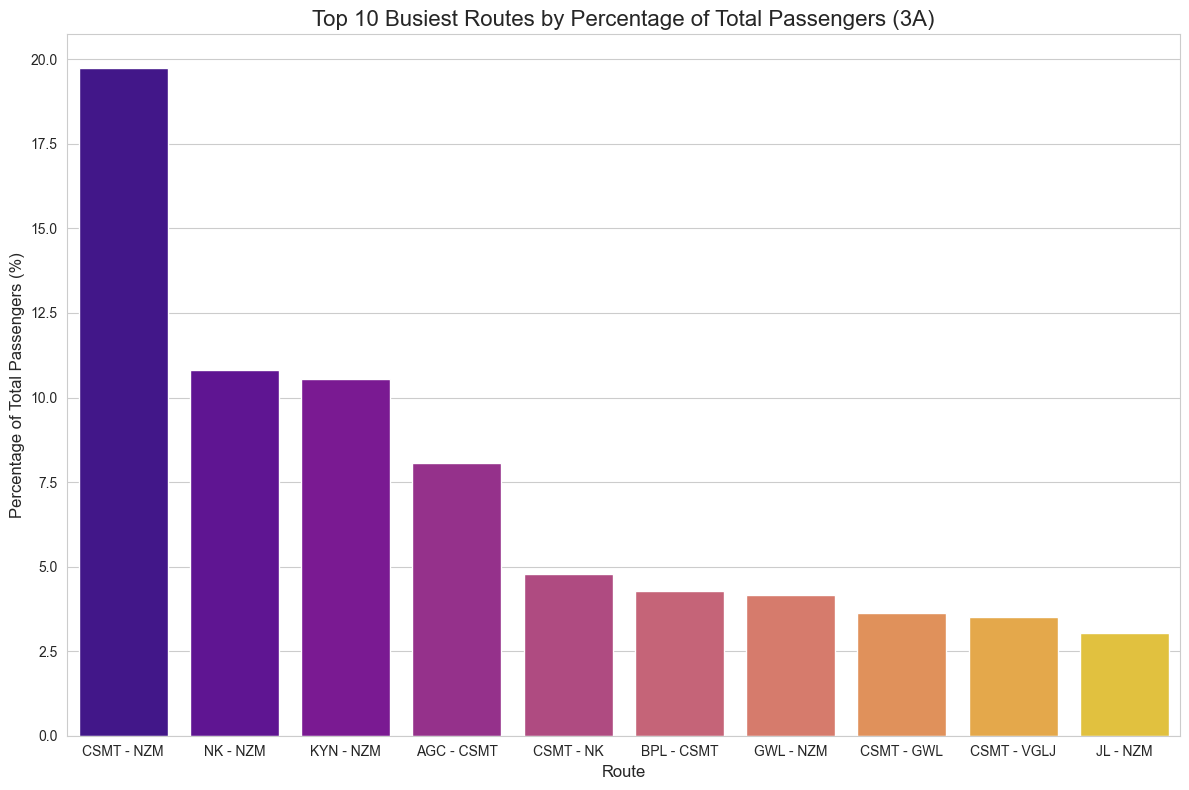

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'df' is your existing DataFrame

# 1. --- Filter and create the canonical 'route' (same as before) ---
df_3A = df[df['cls'] == '3A'].copy()
df_3A['route'] = df_3A.apply(
    lambda row: ' - '.join(sorted([row['brdpt_code'], row['resupto_code']])),
    axis=1
)

# 2. --- Group, sum, and sort (same as before) ---
busiest_routes = df_3A.groupby('route')['PSGN'].sum().reset_index()
busiest_routes.rename(columns={'PSGN': 'total_passengers'}, inplace=True)


# --- 3. NEW: Calculate the percentage for each route ---
# First, find the grand total of all passengers
grand_total_passengers = busiest_routes['total_passengers'].sum()

# Now, create a new 'percentage' column
busiest_routes['percentage'] = (busiest_routes['total_passengers'] / grand_total_passengers) * 100

# Sort by the new percentage column to ensure the order is correct
busiest_routes = busiest_routes.sort_values(by='percentage', ascending=False)


# --- Display the updated DataFrame ---
print("Busiest Routes for Class 3A by Percentage:")
print(busiest_routes.head(10))


# --- 4. MODIFIED: Visualize the results in percentage terms ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plot = sns.barplot(
    # --- CHANGE: Use the new 'percentage' column for the x-axis ---
    y='percentage',
    x='route',
    data=busiest_routes.head(10),
    palette='plasma' # Changed palette for a new look
)

# --- CHANGE: Update titles and labels ---
plot.set_title('Top 10 Busiest Routes by Percentage of Total Passengers (3A)', fontsize=16)
plot.set_ylabel('Percentage of Total Passengers (%)', fontsize=12)
plot.set_xlabel('Route', fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
daily_journey_df.describe()

,journey_date,total_psgn
count,731,731.000000
mean,2024-07-31 00:00:00,1199.124487
min,2023-08-01 00:00:00,445.000000
25%,2024-01-30 12:00:00,1100.500000
50%,2024-07-31 00:00:00,1201.000000
75%,2025-01-29 12:00:00,1324.000000
max,2025-07-31 00:00:00,1612.000000
std,NaN,175.097662


c:\Users\mailt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


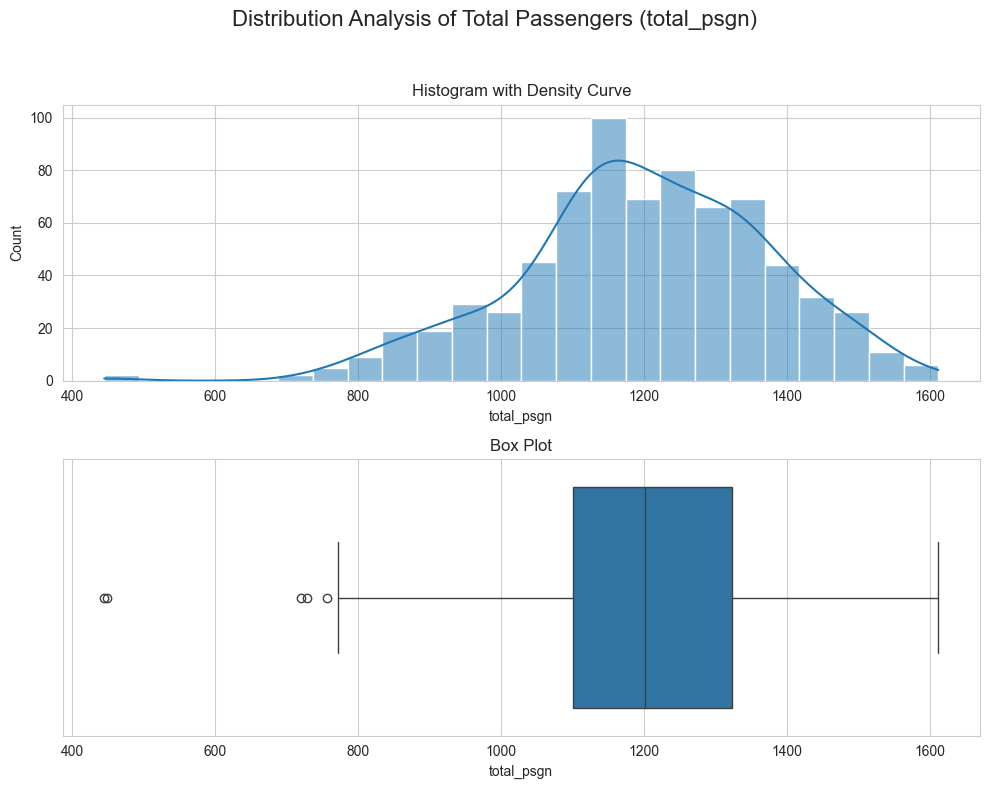

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Distribution Analysis of Total Passengers (total_psgn)', fontsize=16)


# 1. --- Create the Distribution Plot (Histogram + KDE) ---
sns.histplot(
    ax=axes[0],
    data=daily_journey_df,
    x='total_psgn',
    kde=True  # This adds the density line, creating the distplot effect
)
axes[0].set_title('Histogram with Density Curve')


# 2. --- Create the Box Plot ---
sns.boxplot(
    ax=axes[1],
    data=daily_journey_df,
    x='total_psgn'
)
axes[1].set_title('Box Plot')


# --- Display the plots ---
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for the suptitle
plt.show()


In [31]:
daily_journey_df_high= daily_journey_df[daily_journey_df["total_psgn"]>1300].copy()

with pd.option_context('display.max_rows', None):
    print(daily_journey_df_high)


    journey_date  total_psgn day_of_week      month
109   2023-11-18        1590    Saturday   November
110   2023-11-19        1449      Sunday   November
111   2023-11-20        1360      Monday   November
112   2023-11-21        1389     Tuesday   November
115   2023-11-24        1368      Friday   November
116   2023-11-25        1505    Saturday   November
117   2023-11-26        1503      Sunday   November
118   2023-11-27        1426      Monday   November
119   2023-11-28        1355     Tuesday   November
120   2023-11-29        1323   Wednesday   November
122   2023-12-01        1339      Friday   December
123   2023-12-02        1427    Saturday   December
124   2023-12-03        1456      Sunday   December
126   2023-12-05        1317     Tuesday   December
127   2023-12-06        1311   Wednesday   December
128   2023-12-07        1405    Thursday   December
129   2023-12-08        1420      Friday   December
130   2023-12-09        1509    Saturday   December
131   2023-1

In [30]:
dff=daily_journey_df_high.groupby('day_of_week')['month'].count().reset_index()
dff

,day_of_week,month
0,Friday,33
1,Monday,28
2,Saturday,43
3,Sunday,47
4,Thursday,19
5,Tuesday,23
6,Wednesday,21


Original DataFrame shape: (731, 4)
First half shape (first 364 rows): (364, 4)
Second half shape (the rest): (367, 4)


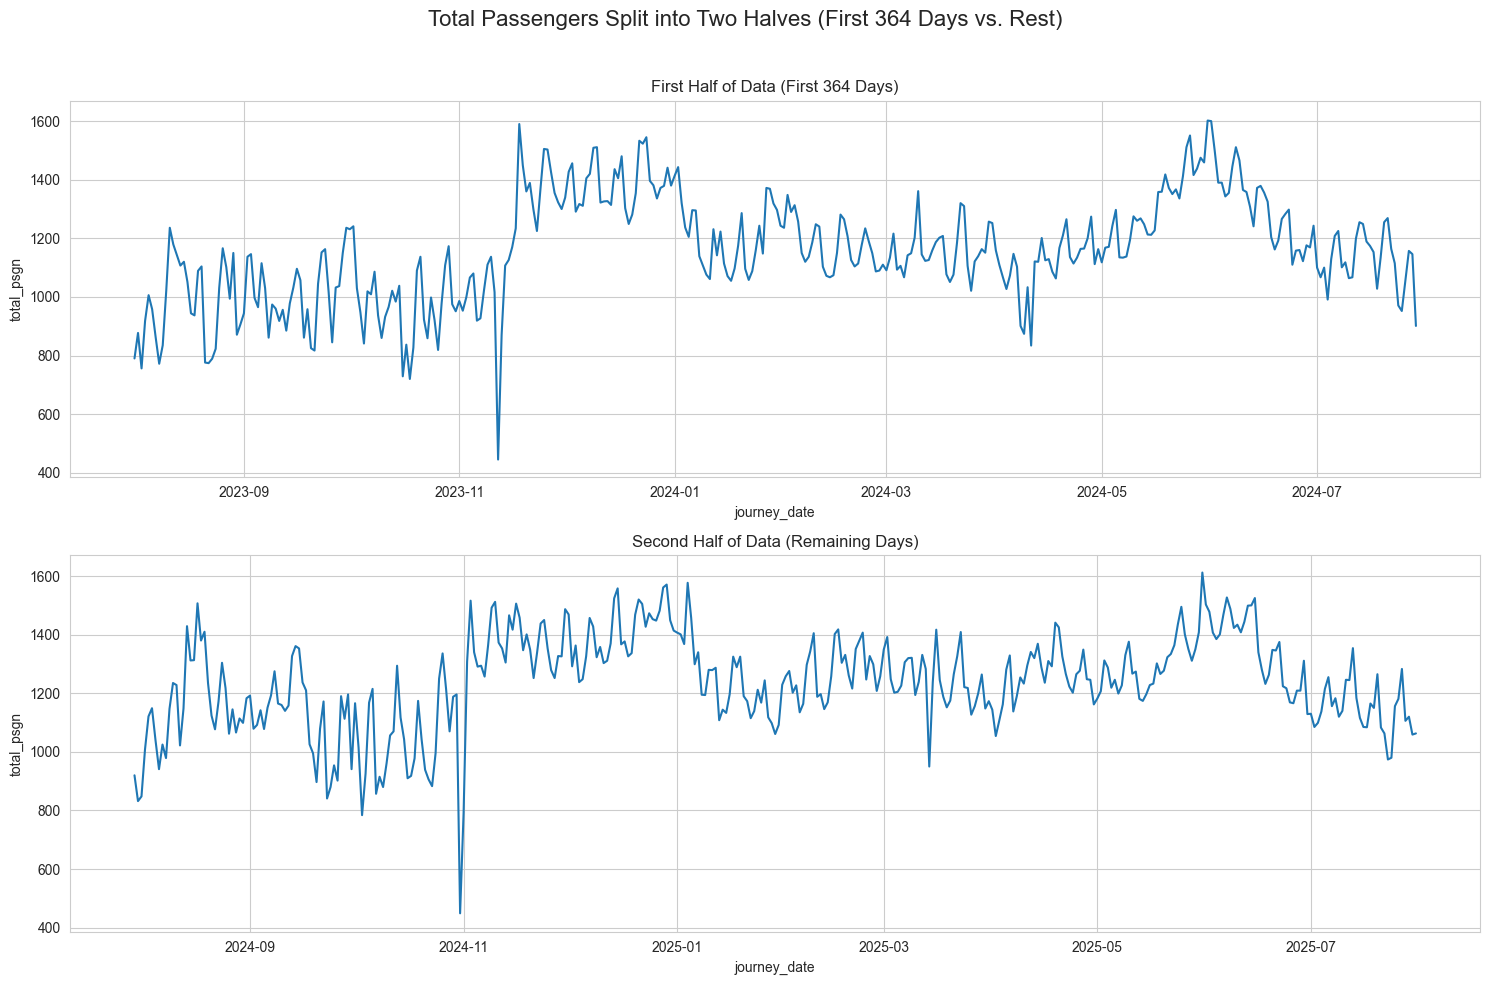


--- Correlation Analysis ---
The correlation between the passenger counts of the two halves is: 0.6445


In [35]:



daily_journey_df = daily_journey_df.sort_values('journey_date').reset_index(drop=True)


# --- 1. Split the DataFrame into the first 364 rows and the rest ---
split_point = 364
daily_journey_df1 = daily_journey_df.iloc[:split_point].copy()
daily_journey_df2 = daily_journey_df.iloc[split_point:].copy()

print(f"Original DataFrame shape: {daily_journey_df.shape}")
print(f"First half shape (first 364 rows): {daily_journey_df1.shape}")
print(f"Second half shape (the rest): {daily_journey_df2.shape}")


# --- 2. Visualize the Two Halves ---
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=False, sharey=True)
fig.suptitle('Total Passengers Split into Two Halves (First 364 Days vs. Rest)', fontsize=16)

# Plot for the first half
sns.lineplot(ax=axes[0], x='journey_date', y='total_psgn', data=daily_journey_df1)
axes[0].set_title('First Half of Data (First 364 Days)')

# Plot for the second half
sns.lineplot(ax=axes[1], x='journey_date', y='total_psgn', data=daily_journey_df2)
axes[1].set_title('Second Half of Data (Remaining Days)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- 3. Calculate the Correlation ---
# Align the two series from their start and compare up to the length of the shorter one
df1_vals = daily_journey_df1['total_psgn'].reset_index(drop=True)
df2_vals = daily_journey_df2['total_psgn'].reset_index(drop=True)
min_len = min(len(df1_vals), len(df2_vals))

# Calculate the Pearson correlation coefficient
correlation = df1_vals.iloc[:min_len].corr(df2_vals.iloc[:min_len])

print("\n--- Correlation Analysis ---")
print(f"The correlation between the passenger counts of the two halves is: {correlation:.4f}")